In [1]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/332.0 MB 4.8 MB/s eta 0:01:10
   ---------------------------------------- 1.8/332.0 MB 4.1 MB/s eta 0:01:20
   ---------------------------------------- 2.6/332.0 MB 4.0 MB/s eta 0:01:24
   ---------------------------------------- 3.1/332.0 MB 3.9 MB/s eta 0:01:25
   ---------------------------------------- 3.7/332.0 MB 3.4 MB/s eta 0:01:37
   ---------------------------------------- 3.9/332.0 MB 3.0 MB/s eta 0:01:49
    --------------------------------------- 4.5/332.0 MB 3.1 MB/s eta 0:01:48
    --------------------------------------- 5.2/332.0 MB 3.1 MB/s eta 0:01:44
    --------------------------------------- 6.0/332.0 MB 3.2 MB/s eta 0:01:42
    --------------------------------------- 6.8/332.0 MB 3.3 MB/s eta 0:01:40
    --------------------------------------- 7.6/332.0 MB 3.3 MB/s eta 0:01:38
   - -------------------------------------- 8.4/332.0 MB 3.3 MB/s eta 0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


**MINIST Digit Classification**

1.Load MNIST Dataset

In [3]:
#We use keras (Tensorflow)
from tensorflow.keras.datasets import mnist

#Load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print("Train shape:",x_train.shape)
print("Test shape:",x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


2.Data Preprocessing

In [4]:
#Normalize pixel values
x_train = x_train / 255.0
x_test =  x_test / 255.0

#Flatten image for ANN
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

3.Build ANN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

model = Sequential([
    Input(shape=(784,)),
    Dense(125, activation="relu", input_shape=(784,)),     #Lean patterns
    Dense(64, activation="relu"),                          #depper learning
    Dense(10, activation="softmax")                        #Probbility fot digits 0-1
])                      
 

4.Compile the Model

In [10]:
model.compile( optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"]
             )

5.Strat traing(preview)

In [11]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9232 - loss: 0.2639 - val_accuracy: 0.9632 - val_loss: 0.1195
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1091 - val_accuracy: 0.9728 - val_loss: 0.0893
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0754 - val_accuracy: 0.9740 - val_loss: 0.0916
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0557 - val_accuracy: 0.9773 - val_loss: 0.0787
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0452 - val_accuracy: 0.9747 - val_loss: 0.0980


6.Train the Model 

In [12]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=5, 
                    validation_split=0.1
                   )

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0356 - val_accuracy: 0.9755 - val_loss: 0.0966
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9803 - val_loss: 0.0857
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0251 - val_accuracy: 0.9767 - val_loss: 0.0931
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 0.9795 - val_loss: 0.0910
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9778 - val_loss: 0.1017


7.Evaluate on Test Data

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0938
Test Accuracy: 0.977400004863739


8.Predict Individual Digits

In [14]:
import numpy as np

prediction = model.predict(x_test)

#First test large prediction
pred_label = np.argmax(prediction[0])

print("Predicted digit:", pred_label)
print("Actual digit:", y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted digit: 7
Actual digit: 7


9.Visualize Prediction

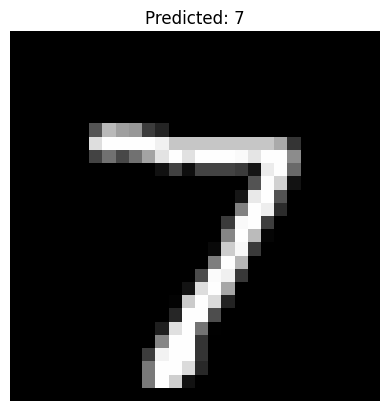

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {pred_label}")
plt.axis("off")
plt.show()


10.Plot Training Accuracy & Loss

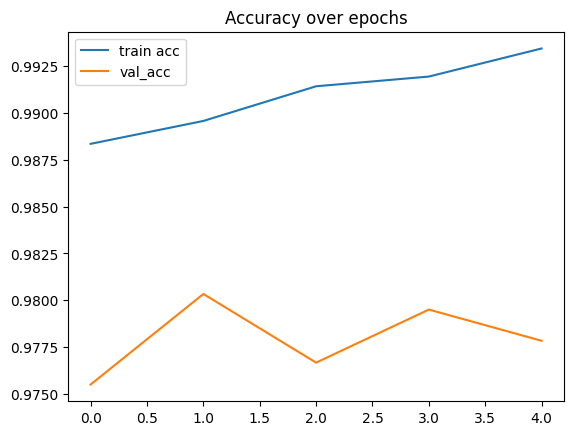

In [18]:
plt.plot(history.history["accuracy"],
         label="train acc")
plt.plot(history.history["val_accuracy"],
         label="val_acc")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()
